# Chapter 02. Small Worlds and Large Worlds

#### Chapter Code

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import stats
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Code 2.1**

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways/sum(ways)

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

**Code 2.2**

In [3]:
stats.binom.pmf(k=6, n=9, p=0.5)

0.16406250000000006

That number is the relative number of ways to get 6 water (in our globe-tossing model) holding p at 0.5.

Much later in the book, in Chapter 10, we’ll see that the binomial distribution is rather special, because it represents the maximum entropy way to count binary events. “Maximum entropy” means that the distribution contains no additional information other than: There are two events, and the probabilities of each in each trial are p and 1 − p. Chapter 10 explains this in more detail, and the details can certainly wait.

**Code 2.3** Grid Approximation

1. Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.

2. Compute the value of the prior at each parameter value on the grid.

3. Compute the likelihood at each parameter value.

4. Compute the unstandardized posterior at each parameter value by multiplying the prior by the likelihood.

5. Finally, standardize the posterior by dividing the values by the sum of all values.

In [4]:
def grid_approximation(n_success, n_trials, n_points):
    # Define the grid.
    p_grid = np.linspace(0, 1, n_points)
    
    # Define the prior.
    # For a uniform prior.
    prior = np.repeat(1, n_points)
    
    # Compute the likelihood at each parameter value.
    likelihood = stats.binom.pmf(n_success, n_trials, p_grid)
    
    # Compute the unstandardized posterior at each parameter value.
    posterior_unstd = likelihood * prior
    
    # Standardize the posterior.
    posterior_std = posterior_unstd / np.sum(posterior_unstd)
    
    # We want both the grid and posterior for plotting.
    return p_grid, posterior_std

In [5]:
p_grid, posterior = grid_approximation(n_success=6, n_trials=9, n_points=500)

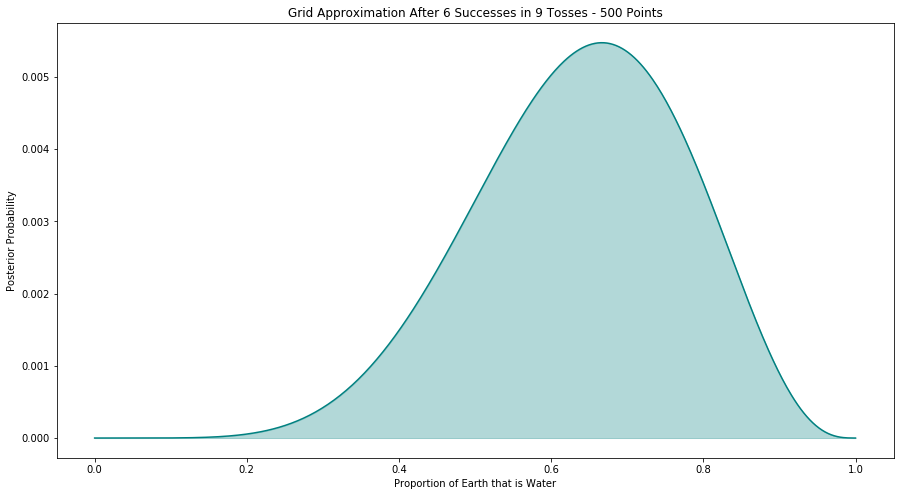

In [6]:
plt.figure(figsize=(15, 8))
plt.fill_between(p_grid, posterior, color="teal", alpha=0.3)
plt.plot(p_grid, posterior, color="teal")
plt.title('Grid Approximation After 6 Successes in 9 Tosses - 500 Points')
plt.xlabel('Proportion of Earth that is Water')
plt.ylabel('Posterior Probability');

Let's try the prior where we assume a 0% chance of the true proportion of water being less than 50%

In [7]:
def grid_approximation(n_success, n_trials, n_points):
    p_grid = np.linspace(0, 1, n_points)
    #prior = np.repeat(1, n_points)
    prior = (np.linspace(0, 1, n_points) >= .5).astype(int)
    likelihood = stats.binom.pmf(n_success, n_trials, p_grid)
    posterior_unstd = likelihood * prior
    posterior_std = posterior_unstd / np.sum(posterior_unstd)
    return p_grid, posterior_std

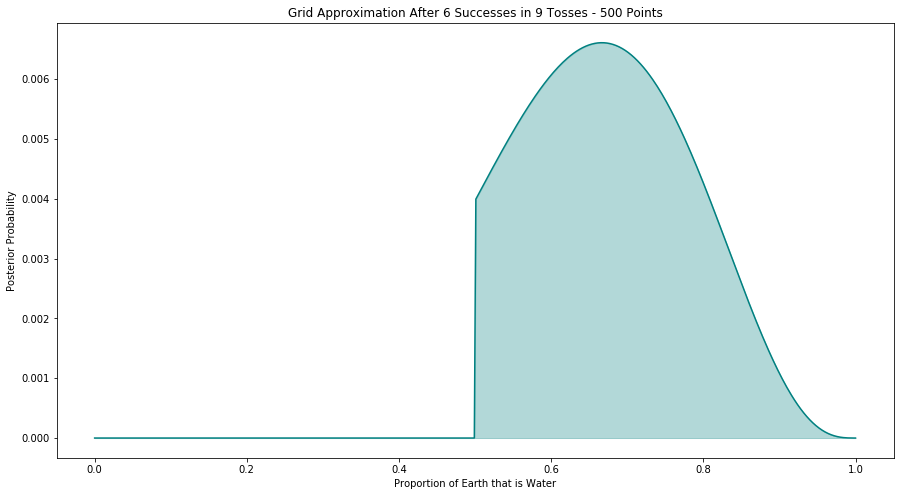

In [8]:
p_grid, posterior = grid_approximation(n_success=6, n_trials=9, n_points=500)
plt.figure(figsize=(15, 8))
plt.fill_between(p_grid, posterior, color="teal", alpha=0.3)
plt.plot(p_grid, posterior, color="teal")
plt.title('Grid Approximation After 6 Successes in 9 Tosses - 500 Points')
plt.xlabel('Proportion of Earth that is Water')
plt.ylabel('Posterior Probability');

#### End Chapter Problems

**2M4.** Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3.

In [9]:
CARDS = (('B', 'B'), ('B', 'W'), ('W', 'W'))
n_success = 0
n_trials = 0

while n_trials < 10**6:
    card = random.choice(CARDS)
    side_num = random.randint(0,1)
    color_side_up = card[side_num]
    color_side_down = card[1-side_num]

    if color_side_up == 'B':
        n_trials += 1
        if color_side_down == 'B':
            n_success += 1
        
n_success/n_trials

0.666699

**2M5.** Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

In [10]:
CARDS = (('B', 'B'), ('B', 'W'), ('W', 'W'), ('B', 'B'))
n_success = 0
n_trials = 0

while n_trials < 10**6:
    card = random.choice(CARDS)
    side_num = random.randint(0,1)
    color_side_up = card[side_num]
    color_side_down = card[1-side_num]

    if color_side_up == 'B':
        n_trials += 1
        if color_side_down == 'B':
            n_success += 1
        
n_success/n_trials

0.80016

**2M6.** Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5.

In [11]:
CARDS = (('B', 'B'), ('B', 'W'), ('B', 'W'), ('W', 'W'), ('W', 'W'), ('W', 'W'))
n_success = 0
n_trials = 0

while n_trials < 10**6:
    card = random.choice(CARDS)
    side_num = random.randint(0,1)
    color_side_up = card[side_num]
    color_side_down = card[1-side_num]

    if color_side_up == 'B':
        n_trials += 1
        if color_side_down == 'B':
            n_success += 1
        
n_success/n_trials

0.500582

**2M7.** Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

In [12]:
CARDS = (('B', 'B'), ('B', 'W'), ('W', 'W'))

n_success = 0
n_trials = 0

while n_trials < 10**5:
    card_indices_chosen = np.random.choice([0, 1, 2], size=2, replace=False)
    first_card = CARDS[card_indices_chosen[0]]
    side_num = random.randint(0,1)
    first_color_side_up = first_card[side_num]
    first_color_side_down = first_card[1-side_num]
    
    if first_color_side_up == 'B':
        
        second_card = CARDS[card_indices_chosen[1]]
        side_num = random.randint(0,1)
        second_color_side_up = second_card[side_num]
        second_color_side_down = second_card[1-side_num]
        
        if second_color_side_up == 'W':
            n_trials += 1
            if first_color_side_down == 'B':
                n_success += 1
                
n_success/n_trials

0.74889

**2H1.** Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

In [13]:
import pandas as pd # I'm joking
pandas = ('A', 'B')
p_twins = {'A':.10, 'B':.20}
n_twins = 0
n_success = 0
n_sims = 10**6

while n_twins < n_sims:
    panda = random.choice(pandas)
    if random.random() <= p_twins[panda]:
        n_twins += 1
        if random.random() <= p_twins[panda]:
            n_success += 1
            
percentage = round((n_success/n_twins)*100, 2)
print(f'If a panda\'s first birth is twins, the second birth is twins {percentage}% of the time.')

If a panda's first birth is twins, the second birth is twins 16.73% of the time.


**2H2.** Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

In [14]:
panda_counts = {panda:0 for panda in pandas}
n_twins = 0

while n_twins < n_sims:
    panda = random.choice(pandas)
    if random.random() <= p_twins[panda]:
        n_twins += 1
        panda_counts[panda] += 1
        
panda_counts['A']/n_sims

0.333266

**2H3.** Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.